# Introduction

The Shapiro-Wilk test is a widely used statistical procedure for testing the normality of a data set. Developed by Samuel Shapiro and Martin Wilk in 1965, this test is particularly effective for small sample sizes, typically considered to be less than 50. The test calculates a statistic, often denoted as W, which evaluates the degree to which a set of data conforms to a normal distribution.

Here's a brief overview of the test:

1. **Purpose**: The primary objective of the Shapiro-Wilk test is to determine whether a given sample comes from a normally distributed population. This is crucial in statistics, as many parametric tests assume normality of the data.

2. **Method**: The test compares the order statistics (sorted data points) of the sample to the expected values of these order statistics if the data were normally distributed. The W statistic is a measure of how closely the data points match the normal distribution.

3. **W Statistic**: The W value ranges from 0 to 1, where values close to 1 indicate that the data are likely normally distributed. A lower W value suggests deviations from normality.

4. **Interpretation**: The result of the test includes the W statistic and a p-value. The null hypothesis of the test is that the data are normally distributed. If the p-value is less than a chosen significance level (commonly 0.05), the null hypothesis is rejected, suggesting that the data are not normally distributed.

5. **Applications**: The Shapiro-Wilk test is used in various fields for preliminary data analysis, especially where normality is an assumption for further statistical tests, such as ANOVA, t-tests, and regression analysis.

Overall, the Shapiro-Wilk test is a fundamental tool in statistics for assessing the normality of data, providing an essential step in many analytical procedures.

**In this Jupyter notebook we will plot the distribution of W statistic for sample size $n$ through Monte Carlo simluation. Later we will compare the test result of our**

# W statistic

## Some theory

The W statistic is give by the following expression:

$$
W = \frac{\left(\sum\limits_{j=1}^{n} a_j X_{(j)}\right)^2}{\sum\limits_{j=1}^{n} (X_j - \overline{X})^2}
$$

Where 

$X_{(j)}$ is the $j^{th}$ order statistic. For instance, we draw a sample of size 10 from a distribution, we arrange the sample in ascending order. So $X_{(1)}$ would be the smallest value of the sample and $X_{(10)}$ would be the highest.

$a_j \in [a_1, a_2, ..., a_n] = \frac{1}{C} \left( m^{T}V^{-1} \right)$

$C := (m^T V^{-1} V^{-1} m)^\frac{1}{2}$

$V$ is covariance matrix where $V_{i,j}=\mathbb{E}[(Z_{(i)}-m_i)(Z_{(j)}-m_j)]$

$m := [m_1, m_2, ..., m_n]$, where $m_i:= \mathbb{E}[Z_{(i)}]$

$Z_{(i)}$ is $i^{th}$ order statistic. And $Z_i$ is $i.i.d$ $N(0,1)$

**Note:** $\mathbb{E}[Z_{(i)}]$ of order statistics depends on sample size. It is because order statistics are determined by the ranks of the data points in a sample, and as the sample size changes, the distribution of these ranks changes. As the sample size increases, the range of possible values for a particular order statistic also increases. For instance, the maximum value in a larger sample is likely to be greater than the maximum in a smaller sample simply because there are more data points from which the maximum can be drawn.


## Calculating expectation of order statistics

In a sample of size $(n)$ the expected value of the $(r)$ th largest order statistic is given by
$$
E(r, n) = \frac{n!}{(r - 1)!(n - r)!} \int_{-\infty}^{\infty} x(1 - \Phi(x))^{r-1}(\Phi(x))^{n-r}\phi(x) \, dx,
$$
where 
$$
\phi(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}x^2\right)
$$
and
$$
\Phi(x) = \int_{-\infty}^{x} \phi(z) \, dz.
$$

by Royston (1982).

In [1]:
# importing libraries
from scipy.integrate import quad
from scipy.special import binom
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [2]:
# Calculation expectation
inf, phi, Phi = float('inf'), norm.pdf, norm.cdf

def E(r, n):
    def f(x):   
        F = Phi(x)
        return x*(1-F)**(r-1)*F**(n-r)*phi(x)
    return r*binom(n, r)*quad(f, -inf, inf)[0]

## Creating vector m

In [3]:
# defining the sample size, let
n=10

In [4]:
# creating vector m
m=np.array([E(i,n) for i in range(1,n+1)])
m=m[::-1] #reversing the order since Royston (1982) give j-th largest order statistic
m=m.reshape((n,1))
m

array([[-1.53875273],
       [-1.00135704],
       [-0.65605911],
       [-0.3757647 ],
       [-0.12266775],
       [ 0.12266775],
       [ 0.3757647 ],
       [ 0.65605911],
       [ 1.00135704],
       [ 1.53875273]])

## Creating covariance matrix V

$V_{i,j}=\mathbb{E}[(Z_{(i)}-m_i)(Z_{(j)}-m_j)]$

To create the  covariance matrix $V$, we run a small simulation.

In [5]:
np.random.seed(269)
matrix=np.random.normal(0,1,(1000000,n))
matrix=np.sort(matrix,axis=1)
cov_matrix = np.cov(matrix, rowvar=False)
cov_matrix

array([[0.34480823, 0.17113808, 0.11640678, 0.08818278, 0.07066647,
        0.05855113, 0.04903132, 0.04097532, 0.03424416, 0.02729233],
       [0.17113808, 0.21423015, 0.14650601, 0.11143691, 0.08958855,
        0.07415785, 0.06220751, 0.05215463, 0.04342614, 0.03446663],
       [0.11640678, 0.14650601, 0.17499184, 0.13362146, 0.1075927 ,
        0.08917342, 0.07486115, 0.06289104, 0.05235331, 0.04142845],
       [0.08818278, 0.11143691, 0.13362146, 0.15778144, 0.12737174,
        0.10577756, 0.08898409, 0.07488866, 0.06251412, 0.04923958],
       [0.07066647, 0.08958855, 0.1075927 , 0.12737174, 0.15084324,
        0.12552122, 0.10573817, 0.08902319, 0.07434763, 0.05857413],
       [0.05855113, 0.07415785, 0.08917342, 0.10577756, 0.12552122,
        0.15084589, 0.12736883, 0.10756093, 0.08972441, 0.07074192],
       [0.04903132, 0.06220751, 0.07486115, 0.08898409, 0.10573817,
        0.12736883, 0.15776356, 0.13360747, 0.11161433, 0.0881613 ],
       [0.04097532, 0.05215463, 0.0628910

In [6]:
m=(np.mean(matrix,axis=0)).reshape(10,1)
m

array([[-1.53889117],
       [-1.00124066],
       [-0.65582729],
       [-0.37548451],
       [-0.12268297],
       [ 0.12199091],
       [ 0.3747911 ],
       [ 0.65507792],
       [ 1.00003415],
       [ 1.53729462]])

## Creating the length C

$C := (m^T V^{-1} V^{-1} m)^\frac{1}{2}$

In [7]:
C = (m.T @ (np.linalg.inv(cov_matrix)) @ (np.linalg.inv(cov_matrix)) @ m)**(0.5) # '@' multplies two matrices
C

array([[6.19427319]])

## Creating vector a

$a = [a_1, a_2, ..., a_n] = \frac{1}{C} \left( m^{T}V^{-1} \right)$



In [8]:
a=(m.T @ (np.linalg.inv(cov_matrix)))/(C)
a

array([[-0.57207524, -0.3328623 , -0.2068158 , -0.12950197, -0.04215577,
         0.04442722,  0.1267467 ,  0.20638143,  0.32896421,  0.57598846]])

## Monte Carlo simulation to W statistic distribution

$$
W = \frac{\left(\sum\limits_{j=1}^{n} a_j X_{(j)}\right)^2}{\sum\limits_{j=1}^{n} (X_j - \overline{X})^2}
$$

In [9]:
# generating a many samples
iteration=1000000
np.random.seed(2609)
x_mat=np.random.normal(0,1,(iteration,n))
x_mat=np.sort(x_mat,axis=1)
x_mat

array([[-2.02258982, -1.19155678, -0.81895459, ...,  1.30640262,
         1.45529678,  2.35676065],
       [-2.3236977 , -1.14898889, -0.55883736, ...,  0.19719931,
         0.65898349,  1.63017364],
       [-1.38408064, -1.08530663, -0.80016064, ...,  0.56901273,
         1.2402628 ,  2.40098544],
       ...,
       [-1.44008624, -1.24841506, -0.65395294, ..., -0.04813313,
         0.68951906,  1.21878072],
       [-0.81335319, -0.78517371, -0.69083909, ...,  0.77903271,
         1.52354765,  1.81966713],
       [-1.38512201, -1.02405077, -0.93704861, ...,  0.60640053,
         0.66852956,  1.35122507]])

In [10]:
# calculation the variance of each sample
x_var=np.var(x_mat, axis=1,ddof=1)
x_var

array([1.85990199, 1.09925087, 1.35017523, ..., 0.64084908, 0.93247314,
       0.75201877])

In [11]:
denomenator=(x_var)*(n-1) #this is our denomenator of W statistic
denomenator=denomenator.reshape(1,iteration)
denomenator

array([[16.73911793,  9.89325784, 12.15157709, ...,  5.76764168,
         8.39225825,  6.76816897]])

In [12]:
numerator = (a @ x_mat.T)**2 #this is our numerator of W statistic
numerator=numerator.reshape(1,iteration)
numerator

array([[16.3838163 ,  9.54557876, 11.27184021, ...,  5.40733275,
         7.51559228,  6.57310058]])

In [13]:
W=numerator/denomenator
W=W.flatten() #without flatten, plt takes a lot time to plot hist
W

array([0.97877417, 0.96485697, 0.92760307, ..., 0.93752924, 0.89553873,
       0.97117856])

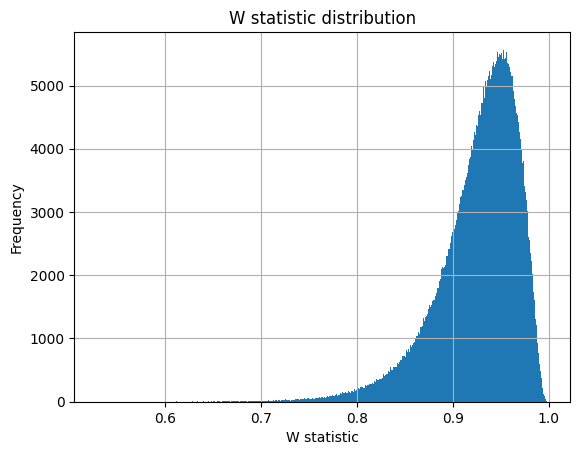

In [14]:
plt.hist(W,bins=1000)
plt.grid()
plt.title("W statistic distribution")
plt.xlabel("W statistic")
plt.ylabel("Frequency")
plt.show()

# Using our created distribution to test and comparing it with in-built shapiro test in library scipy-stats

In [27]:
#np.random.seed(2609)
y=np.random.normal(1500,49.5,n)
#y=np.random.uniform(200,1000,n)

y=np.sort(y)
shapiro_W_scipy, shapiro_p_scipy = shapiro(y)
W_our=(((a @ y.T)**2)/(np.var(y,ddof=1)*(n-1)))[0]
W_our_p=(((W<W_our).sum())/len(W))

# Display the results
print(f"Shapiro-Wilk Test for Normality")
print(f"Statistic: {shapiro_W_scipy}")
print(f"P-value: {shapiro_p_scipy}\n")

print(f"Our_W_statistic: {W_our}")
print(f"Our_P_value: {W_our_p}\n")


Shapiro-Wilk Test for Normality
Statistic: 0.8404010534286499
P-value: 0.044615261256694794

Our_W_statistic: 0.821847072710419
Our_P_value: 0.027235



In [34]:
y=np.random.normal(200,9.5,(10000,3))
np.mean(y,axis=0)

array([200.01399773, 200.18990977, 199.93685563])

In [28]:
y=np.random.normal(0,1,(10000,n))

#y=np.random.uniform(200,1000,(10000,n))
y=np.sort(y,axis=1)
W_our=[]
W_our_p=[]
shapiro_W_p=[]
for i in range(10000):  
    shapiro_W_p.append(shapiro(y[i]))
    W_our.append((((a @ y[i].T)**2)/(np.var(y[i],ddof=1)*(n-1)))[0])
    W_our_p.append((((W<W_our[i]).sum())/len(W)))



In [29]:
p_shapiro=[i[1] for i in shapiro_W_p]
len([x for x in p_shapiro if x < 0.05])


508

In [30]:
len([x for x in W_our_p if x < 0.05])

508

In [ ]:
plt.scatter([1 for i in range(100)],[shapiro_W_p[i][1] for i in range(100)])
plt.scatter([2 for i in range(100)],W_our_p[0:100])

# References

Royston, J. P. (1982). Algorithm AS 177: Expected normal order statistics (exact and approximate). Journal of the royal statistical society. Series C (Applied statistics), 31(2), 161-165.

In [ ]:
cov_matrix

In [ ]:
np.mean(x_mat,axis=0).reshape(10,1)

In [ ]:
from __future__ import annotations
import math
import warnings
from collections import namedtuple

import numpy as np
from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)

from scipy import optimize, special, interpolate, stats
from scipy._lib._bunch import _make_tuple_bunch
from scipy._lib._util import _rename_parameter, _contains_nan, _get_nan

from . import _statlib
from . import _stats_py
from ._fit import FitResult
from ._stats_py import find_repeats, _normtest_finish, SignificanceResult
from .contingency import chi2_contingency
from . import distributions
from ._distn_infrastructure import rv_generic
from ._hypotests import _get_wilcoxon_distr
from ._axis_nan_policy import _axis_nan_policy_factory
from .._lib.deprecation import _deprecated


In [ ]:
def shapiro(x):
    r"""Perform the Shapiro-Wilk test for normality.

    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.

    Parameters
    ----------
    x : array_like
        Array of sample data.

    Returns
    -------
    statistic : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.

    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.

    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is
    accurate, but the p-value may not be.

    References
    ----------
    .. [1] https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm
    .. [2] Shapiro, S. S. & Wilk, M.B (1965). An analysis of variance test for
           normality (complete samples), Biometrika, Vol. 52, pp. 591-611.
    .. [3] Razali, N. M. & Wah, Y. B. (2011) Power comparisons of Shapiro-Wilk,
           Kolmogorov-Smirnov, Lilliefors and Anderson-Darling tests, Journal of
           Statistical Modeling and Analytics, Vol. 2, pp. 21-33.
    .. [4] ALGORITHM AS R94 APPL. STATIST. (1995) VOL. 44, NO. 4.
    .. [5] B. Phipson and G. K. Smyth. "Permutation P-values Should Never Be
           Zero: Calculating Exact P-values When Permutations Are Randomly
           Drawn." Statistical Applications in Genetics and Molecular Biology
           9.1 (2010).
    .. [6] Panagiotakos, D. B. (2008). The value of p-value in biomedical
           research. The open cardiovascular medicine journal, 2, 97.

    Examples
    --------
    Suppose we wish to infer from measurements whether the weights of adult
    human males in a medical study are not normally distributed [2]_.
    The weights (lbs) are recorded in the array ``x`` below.

    >>> import numpy as np
    >>> x = np.array([148, 154, 158, 160, 161, 162, 166, 170, 182, 195, 236])

    The normality test of [1]_ and [2]_ begins by computing a statistic based
    on the relationship between the observations and the expected order
    statistics of a normal distribution.

    >>> from scipy import stats
    >>> res = stats.shapiro(x)
    >>> res.statistic
    0.7888147830963135

    The value of this statistic tends to be high (close to 1) for samples drawn
    from a normal distribution.

    The test is performed by comparing the observed value of the statistic
    against the null distribution: the distribution of statistic values formed
    under the null hypothesis that the weights were drawn from a normal
    distribution. For this normality test, the null distribution is not easy to
    calculate exactly, so it is usually approximated by Monte Carlo methods,
    that is, drawing many samples of the same size as ``x`` from a normal
    distribution and computing the values of the statistic for each.

    >>> def statistic(x):
    ...     # Get only the `shapiro` statistic; ignore its p-value
    ...     return stats.shapiro(x).statistic
    >>> ref = stats.monte_carlo_test(x, stats.norm.rvs, statistic,
    ...                              alternative='less')
    >>> import matplotlib.pyplot as plt
    >>> fig, ax = plt.subplots(figsize=(8, 5))
    >>> bins = np.linspace(0.65, 1, 50)
    >>> def plot(ax):  # we'll re-use this
    ...     ax.hist(ref.null_distribution, density=True, bins=bins)
    ...     ax.set_title("Shapiro-Wilk Test Null Distribution \n"
    ...                  "(Monte Carlo Approximation, 11 Observations)")
    ...     ax.set_xlabel("statistic")
    ...     ax.set_ylabel("probability density")
    >>> plot(ax)
    >>> plt.show()

    The comparison is quantified by the p-value: the proportion of values in
    the null distribution less than or equal to the observed value of the
    statistic.

    >>> fig, ax = plt.subplots(figsize=(8, 5))
    >>> plot(ax)
    >>> annotation = (f'p-value={res.pvalue:.6f}\n(highlighted area)')
    >>> props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
    >>> _ = ax.annotate(annotation, (0.75, 0.1), (0.68, 0.7), arrowprops=props)
    >>> i_extreme = np.where(bins <= res.statistic)[0]
    >>> for i in i_extreme:
    ...     ax.patches[i].set_color('C1')
    >>> plt.xlim(0.65, 0.9)
    >>> plt.ylim(0, 4)
    >>> plt.show
    >>> res.pvalue
    0.006703833118081093

    If the p-value is "small" - that is, if there is a low probability of
    sampling data from a normally distributed population that produces such an
    extreme value of the statistic - this may be taken as evidence against
    the null hypothesis in favor of the alternative: the weights were not
    drawn from a normal distribution. Note that:

    - The inverse is not true; that is, the test is not used to provide
      evidence *for* the null hypothesis.
    - The threshold for values that will be considered "small" is a choice that
      should be made before the data is analyzed [5]_ with consideration of the
      risks of both false positives (incorrectly rejecting the null hypothesis)
      and false negatives (failure to reject a false null hypothesis).

    """
    x = np.ravel(x)

    N = len(x)
    if N < 3:
        raise ValueError("Data must be at least length 3.")

    x = x - np.median(x)

    a = zeros(N, 'f')
    init = 0

    y = sort(x)
    a, w, pw, ifault = _statlib.swilk(y, a[:N//2], init)
    if ifault not in [0, 2]:
        warnings.warn("Input data for shapiro has range zero. The results "
                      "may not be accurate.")
    if N > 5000:
        warnings.warn("p-value may not be accurate for N > 5000.")

    # `swilk` can return negative p-values for N==3; see gh-18322.
    if N == 3:
        # Potential improvement: precision for small p-values
        pw = 1 - 6/np.pi*np.arccos(np.sqrt(w))
    return ShapiroResult(w, pw)

In [ ]:
y=np.random.normal(1500,19.5,10)
y

In [ ]:
shapiro(y)

In [ ]:
import numpy as np
from scipy.stats import norm

def expected_order_statistic(n, i):
    """
    Approximate the expected value of the i-th order statistic for a standard normal distribution.
    """
    return norm.ppf((i - 0.375) / (n + 0.25))

def covariance_matrix(n):
    """
    Create the covariance matrix V for the order statistics of a standard normal distribution.
    """
    expected_values = np.array([expected_order_statistic(n, i + 1) for i in range(n)])
    V = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i == j:
                V[i, j] = 1 - norm.cdf(expected_values[i]) - norm.pdf(expected_values[i]) * expected_values[i]
            else:
                V[i, j] = norm.cdf(min(expected_values[i], expected_values[j])) - norm.cdf(expected_values[i]) * norm.cdf(expected_values[j])
    
    return V

def unit_row_vector(V, m):
    """
    Compute the unit row vector a' from the covariance matrix V and the expected values vector m.
    """
    V_inv = np.linalg.inv(V)
    C = np.sqrt(m.T @ V_inv @ V_inv @ m)
    a_prime = (m.T @ V_inv) / C
    return a_prime.flatten()

# Example for n=5
n = 5
m = np.array([expected_order_statistic(n, i + 1) for i in range(n)])
V = covariance_matrix(n)
a_prime = unit_row_vector(V, m)

print("Expected Order Statistics (m):", m)
print("Covariance Matrix (V):\n", V)
print("Unit Row Vector (a'):", a_prime)


In [ ]:
expected_order_statistic(10, 2)

In [ ]:
E(9,10)